In [1]:
!pip install mlflow==2.7.1

import pandas as pd
pd.set_option("display.precision", 2)


df = pd.read_csv('data/train.csv',index_col=[0])
test = pd.read_csv('data/test.csv',index_col=[0])

X = df.copy()
y = X.pop('SalePrice')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [3]:
(
    pd.concat([
            df.select_dtypes('number').describe().T.sort_values(by='mean',ascending=False).round(2),
            df.isna().mean().round(2).to_frame('% of Nulls')
        ],
        axis=1,
        join='inner'
    )
    .style.background_gradient(subset='% of Nulls',cmap='viridis')
)

,count,mean,std,min,25%,50%,75%,max,% of Nulls
SalePrice,1460.000000,180921.200000,79442.500000,34900.000000,129975.000000,163000.000000,214000.000000,755000.000000,0.000000
LotArea,1460.000000,10516.830000,9981.260000,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000,0.000000
YrSold,1460.000000,2007.820000,1.330000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,0.000000
YearRemodAdd,1460.000000,1984.870000,20.650000,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000,0.000000
GarageYrBlt,1379.000000,1978.510000,24.690000,1900.000000,1961.000000,1980.000000,2002.000000,2010.000000,0.060000
YearBuilt,1460.000000,1971.270000,30.200000,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000,0.000000
GrLivArea,1460.000000,1515.460000,525.480000,334.000000,1129.500000,1464.000000,1776.750000,5642.000000,0.000000
1stFlrSF,1460.000000,1162.630000,386.590000,334.000000,882.000000,1087.000000,1391.250000,4692.000000,0.000000
TotalBsmtSF,1460.000000,1057.430000,438.710000,0.000000,795.750000,991.500000,1298.250000,6110.000000,0.000000
BsmtUnfSF,1460.000000,567.240000,441.870000,0.000000,223.000000,477.500000,808.000000,2336.000000,0.000000


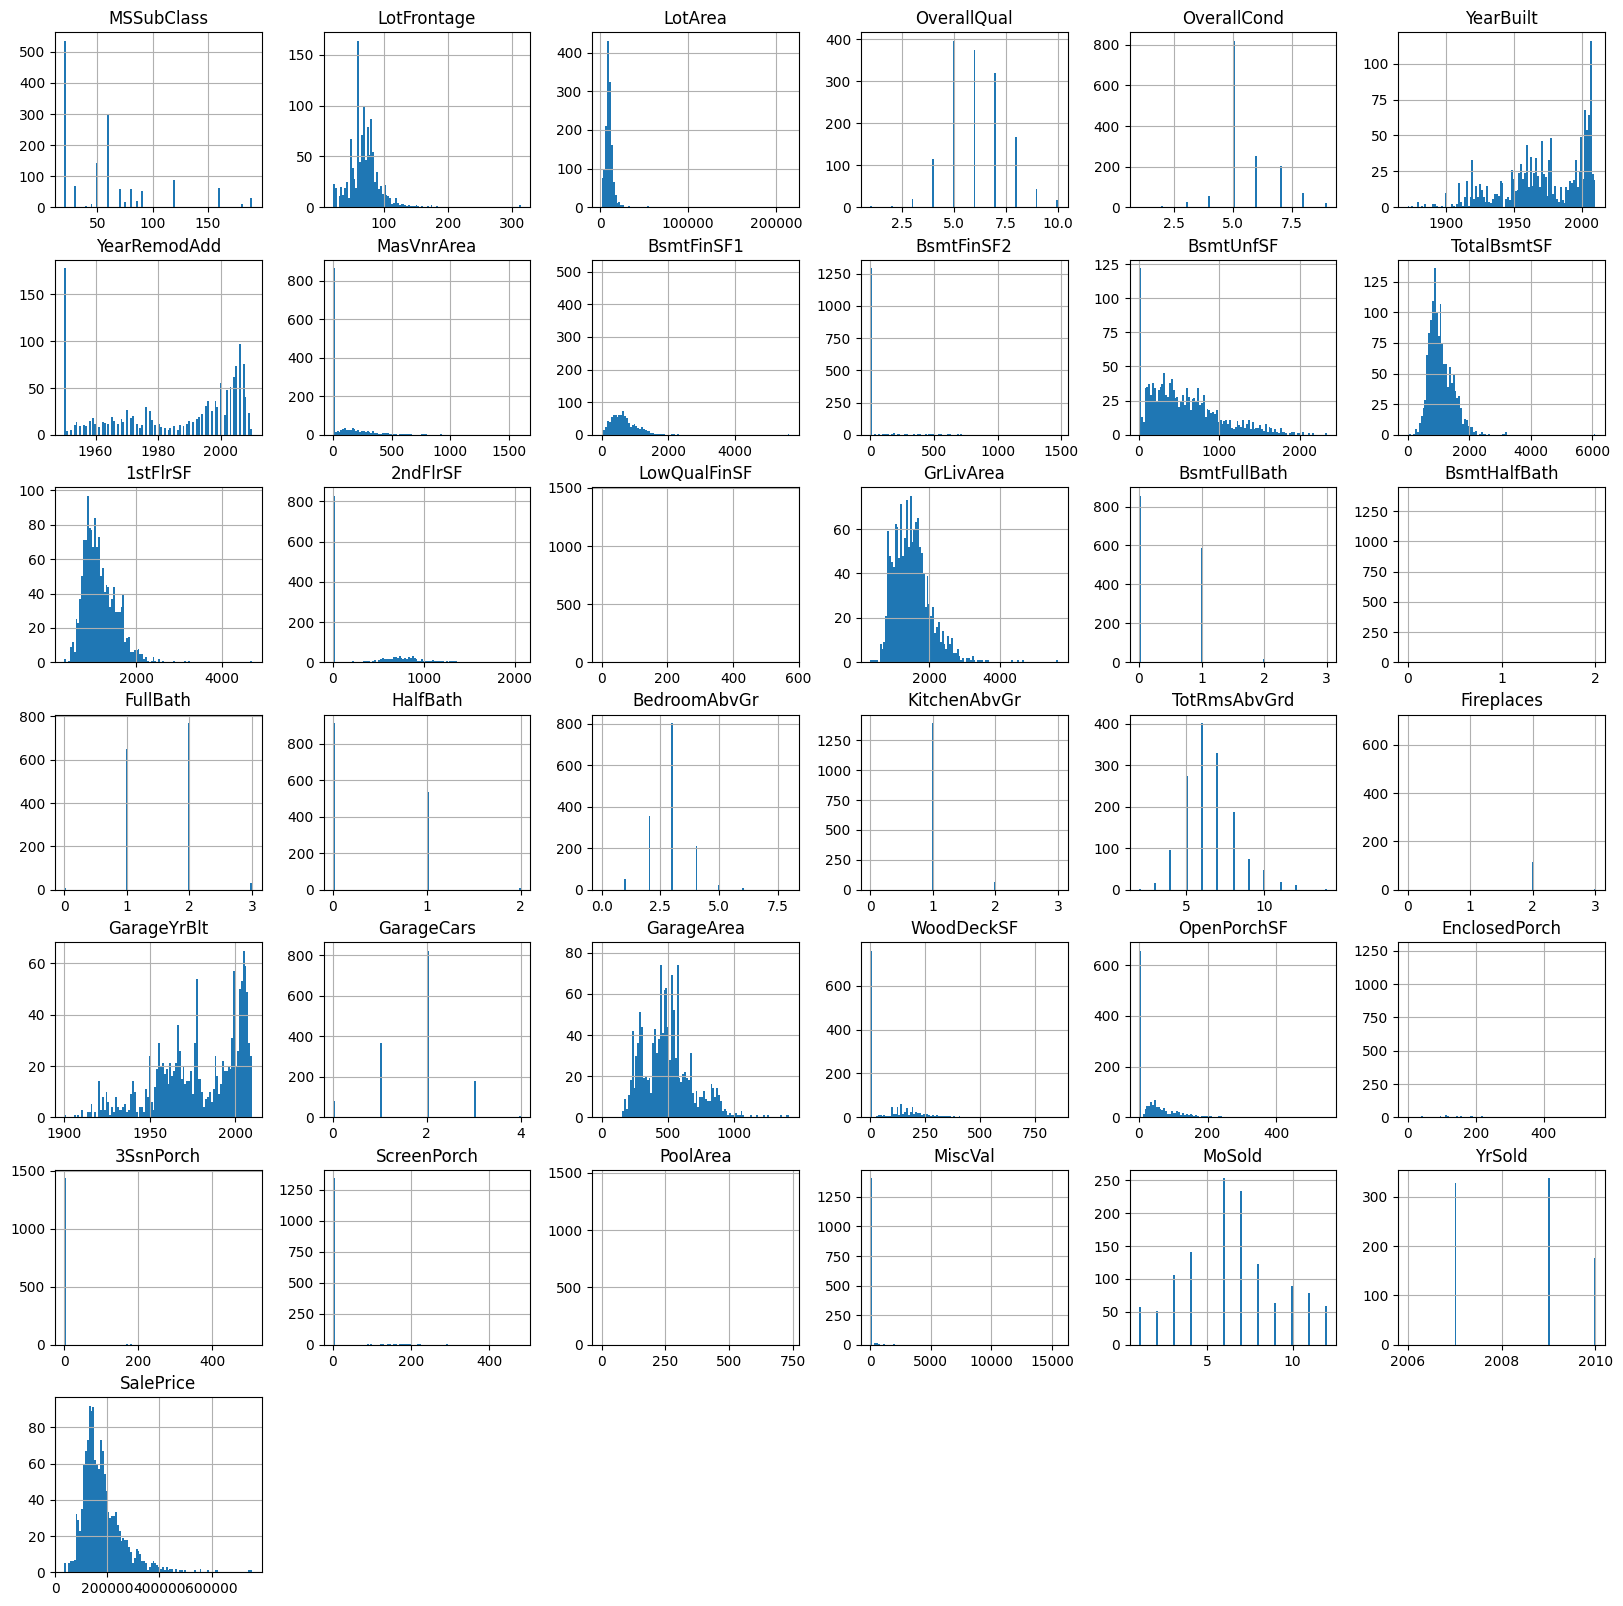

In [3]:
fig = df.hist(bins=100,figsize=(20,20))

In [4]:
pd.concat([df.select_dtypes(object or str).describe(include='all').T,df.isna().mean().to_frame('% of Nulls')],axis=1,join='inner').sort_values(by='% of Nulls',ascending=False).style.background_gradient(subset='% of Nulls',cmap='plasma')

,count,unique,top,freq,% of Nulls
PoolQC,7,3,Gd,3,0.995205
MiscFeature,54,4,Shed,49,0.963014
Alley,91,2,Grvl,50,0.937671
Fence,281,4,MnPrv,157,0.807534
FireplaceQu,770,5,Gd,380,0.472603
GarageType,1379,6,Attchd,870,0.055479
GarageCond,1379,5,TA,1326,0.055479
GarageQual,1379,5,TA,1311,0.055479
GarageFinish,1379,3,Unf,605,0.055479
BsmtFinType2,1422,6,Unf,1256,0.026027


In [5]:
for col in X.select_dtypes(object or str).columns:
    display(X[col].fillna('NaN').value_counts().to_frame(f'Count of {col}'))

,Count of MSZoning
RL,1151
RM,218
FV,65
RH,16
C (all),10


,Count of Street
Pave,1454
Grvl,6


,Count of Alley
NaN,1369
Grvl,50
Pave,41


,Count of LotShape
Reg,925
IR1,484
IR2,41
IR3,10


,Count of LandContour
Lvl,1311
Bnk,63
HLS,50
Low,36


,Count of Utilities
AllPub,1459
NoSeWa,1


,Count of LotConfig
Inside,1052
Corner,263
CulDSac,94
FR2,47
FR3,4


,Count of LandSlope
Gtl,1382
Mod,65
Sev,13


,Count of Neighborhood
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73
SawyerW,59


,Count of Condition1
Norm,1260
Feedr,81
Artery,48
RRAn,26
PosN,19
RRAe,11
PosA,8
RRNn,5
RRNe,2


,Count of Condition2
Norm,1445
Feedr,6
Artery,2
RRNn,2
PosN,2
PosA,1
RRAn,1
RRAe,1


,Count of BldgType
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


,Count of HouseStyle
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


,Count of RoofStyle
Gable,1141
Hip,286
Flat,13
Gambrel,11
Mansard,7
Shed,2


,Count of RoofMatl
CompShg,1434
Tar&Grv,11
WdShngl,6
WdShake,5
Metal,1
Membran,1
Roll,1
ClyTile,1


,Count of Exterior1st
VinylSd,515
HdBoard,222
MetalSd,220
Wd Sdng,206
Plywood,108
CemntBd,61
BrkFace,50
WdShing,26
Stucco,25
AsbShng,20


,Count of Exterior2nd
VinylSd,504
MetalSd,214
HdBoard,207
Wd Sdng,197
Plywood,142
CmentBd,60
Wd Shng,38
Stucco,26
BrkFace,25
AsbShng,20


,Count of MasVnrType
None,864
BrkFace,445
Stone,128
BrkCmn,15
NaN,8


,Count of ExterQual
TA,906
Gd,488
Ex,52
Fa,14


,Count of ExterCond
TA,1282
Gd,146
Fa,28
Ex,3
Po,1


,Count of Foundation
PConc,647
CBlock,634
BrkTil,146
Slab,24
Stone,6
Wood,3


,Count of BsmtQual
TA,649
Gd,618
Ex,121
NaN,37
Fa,35


,Count of BsmtCond
TA,1311
Gd,65
Fa,45
NaN,37
Po,2


,Count of BsmtExposure
No,953
Av,221
Gd,134
Mn,114
NaN,38


,Count of BsmtFinType1
Unf,430
GLQ,418
ALQ,220
BLQ,148
Rec,133
LwQ,74
NaN,37


,Count of BsmtFinType2
Unf,1256
Rec,54
LwQ,46
NaN,38
BLQ,33
ALQ,19
GLQ,14


,Count of Heating
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


,Count of HeatingQC
Ex,741
TA,428
Gd,241
Fa,49
Po,1


,Count of CentralAir
Y,1365
N,95


,Count of Electrical
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1
NaN,1


,Count of KitchenQual
TA,735
Gd,586
Ex,100
Fa,39


,Count of Functional
Typ,1360
Min2,34
Min1,31
Mod,15
Maj1,14
Maj2,5
Sev,1


,Count of FireplaceQu
NaN,690
Gd,380
TA,313
Fa,33
Ex,24
Po,20


,Count of GarageType
Attchd,870
Detchd,387
BuiltIn,88
NaN,81
Basment,19
CarPort,9
2Types,6


,Count of GarageFinish
Unf,605
RFn,422
Fin,352
NaN,81


,Count of GarageQual
TA,1311
NaN,81
Fa,48
Gd,14
Ex,3
Po,3


,Count of GarageCond
TA,1326
NaN,81
Fa,35
Gd,9
Po,7
Ex,2


,Count of PavedDrive
Y,1340
N,90
P,30


,Count of PoolQC
NaN,1453
Gd,3
Ex,2
Fa,2


,Count of Fence
NaN,1179
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


,Count of MiscFeature
NaN,1406
Shed,49
Gar2,2
Othr,2
TenC,1


,Count of SaleType
WD,1267
New,122
COD,43
ConLD,9
ConLI,5
ConLw,5
CWD,4
Oth,3
Con,2


,Count of SaleCondition
Normal,1198
Partial,125
Abnorml,101
Family,20
Alloca,12
AdjLand,4


In [6]:
df.isna().sum().sort_values(ascending=False).loc[lambda x: x!=0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [7]:
df.loc[:,df.isna().sum().sort_values(ascending=False).loc[lambda x: x!=0].index]

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtCond,BsmtQual,BsmtFinType1,MasVnrArea,MasVnrType,Electrical
Id,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,65.0,2003.0,TA,Attchd,RFn,TA,No,Unf,TA,Gd,GLQ,196.0,BrkFace,SBrkr
2,NaN,NaN,NaN,NaN,TA,80.0,1976.0,TA,Attchd,RFn,TA,Gd,Unf,TA,Gd,ALQ,0.0,None,SBrkr
3,NaN,NaN,NaN,NaN,TA,68.0,2001.0,TA,Attchd,RFn,TA,Mn,Unf,TA,Gd,GLQ,162.0,BrkFace,SBrkr
4,NaN,NaN,NaN,NaN,Gd,60.0,1998.0,TA,Detchd,Unf,TA,No,Unf,Gd,TA,ALQ,0.0,None,SBrkr
5,NaN,NaN,NaN,NaN,TA,84.0,2000.0,TA,Attchd,RFn,TA,Av,Unf,TA,Gd,GLQ,350.0,BrkFace,SBrkr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,NaN,NaN,NaN,NaN,TA,62.0,1999.0,TA,Attchd,RFn,TA,No,Unf,TA,Gd,Unf,0.0,None,SBrkr
1457,NaN,NaN,NaN,MnPrv,TA,85.0,1978.0,TA,Attchd,Unf,TA,No,Rec,TA,Gd,ALQ,119.0,Stone,SBrkr
1458,NaN,Shed,NaN,GdPrv,Gd,66.0,1941.0,TA,Attchd,RFn,TA,No,Unf,Gd,TA,GLQ,0.0,None,SBrkr


In [3]:
from sklearn.pipeline import Pipeline

def metrics(
    problem_type:str,
    y: pd.Series,
    y_pred:pd.Series
) -> dict:
    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
    if problem_type == 'regression':
        metrics ={'mse': mean_squared_error(y,y_pred),
                  'mae': mean_absolute_error(y,y_pred),
                  'mape': mean_absolute_percentage_error(y,y_pred),
                  'r2': r2_score(y,y_pred)}
        return metrics
    elif problem_type =='classification':
        pass #TODO: implement classification metrics
        


def StandardPreprocessor(
    numerical_vars: list, 
    categorical_vars: list,
    model_type: str
)->'Pipeline':
    
    from sklearn.preprocessing import (
        StandardScaler, 
        OneHotEncoder, 
        PolynomialFeatures,
        OrdinalEncoder
    )
    
    from sklearn.compose import ColumnTransformer
    
    from sklearn.impute import SimpleImputer
    
    if model_type=='linear':
        categorical_preprocessor = Pipeline([
                    ('imputer', SimpleImputer(strategy='constant')),
                    ('ohe',OneHotEncoder())
        ])

        numerical_preprocessor = Pipeline([
                    ('imputer',SimpleImputer(strategy='mean')),
                    ('scaler',StandardScaler())
        ])

    elif model_type=='non linear':
        categorical_preprocessor = Pipeline([
                    ('imputer', SimpleImputer(strategy='constant')),
                    ('ohe',OrdinalEncoder())
        ])

        numerical_preprocessor = Pipeline([
                    ('imputer',SimpleImputer(strategy='mean')),
        ])
        
        
    preprocessor = ColumnTransformer(
        [
            ('categorical', categorical_preprocessor,categorical_vars), 
            ('numerical',   numerical_preprocessor  ,numerical_vars)
        ]
    )
        
    return preprocessor


def StandardSelector(
    threshold=0.8, 
    k_selected=50
)->'Pipeline':
    from sklearn.feature_selection import SelectKBest,mutual_info_regression
    from feature_engine.selection import SmartCorrelatedSelection
    
    filter_correlated_features = SmartCorrelatedSelection( 
        method="pearson",
        threshold=threshold,
        missing_values="raise",
        selection_method="variance"
    )
    
    feature_selector = SelectKBest(mutual_info_regression,k=k_selected)
    
    selector = Pipeline([
        ('filter',filter_correlated_features),
        ('selector',feature_selector)
    ])
    
    return selector
    
def PreprocessFeatures(
    X: pd.DataFrame,
    y: pd.Series,
    model_name: str,
    preprocessing_fn = StandardPreprocessor, 
    selector_fn = StandardSelector,
    problem_type = 'regression',
    **kwargs
)-> pd.DataFrame:
    
    from sklearn.model_selection import train_test_split
    
    if model_name in ['rf','xgb','lgb']:
        model_type='non linear'
    elif model_name in ['dummy','lr','knr']:
        model_type='linear'
        
    preprocessor = preprocessing_fn(
        X.select_dtypes('number').columns.tolist(),
        X.select_dtypes(object or str).columns.tolist(),
        model_type
    )
    
    selector = selector_fn(
        threshold=kwargs['threshold'],
        k_selected=kwargs['k_selected']
        
    )
    
    pipe = Pipeline([
        ('preprocessor',preprocessor),
        ('selector',selector)
    ])


    pre=preprocessor.fit_transform(X)
    if model_type=='linear' or model_name=='dummy':
        X_preprocessed = pd.DataFrame(pre.toarray(),columns = preprocessor.get_feature_names_out())
    else:
        X_preprocessed = pd.DataFrame(pre,columns=preprocessor.get_feature_names_out())
    #display(X_preprocessed)
    
    X_selected = pd.DataFrame(selector.fit_transform(X_preprocessed,y),columns=selector.get_feature_names_out())

    if problem_type == 'classification':
        X_train,X_test,y_train,y_test =train_test_split(X_selected,y,stratify=y, random_state=42,test_size=0.25)
    else:
        X_train,X_test,y_train,y_test =train_test_split(X_selected,y, random_state=42,test_size=0.25)    
    return X_train,X_test,y_train,y_test



import mlflow
from datetime import datetime

def run_models(
    experiment_id:str,
    models:'model',
    preprocessing_params:dict
) -> None:
    
    with mlflow.start_run(
        run_name=f'{str(datetime.now())}',
        experiment_id=experiment_id,
        nested=True
    ):
        mlflow.log_params(preprocessing_params)
        for model in models.keys():
            X_train,X_test,y_train,y_test= PreprocessFeatures(
                X,
                y,
                model_name=model,
                **preprocessing_params
            )
            
            with mlflow.start_run(
                    experiment_id=experiment_id,
                    run_name=model,
                    nested=True
            ):
                models[model].fit(X_train,y_train)
                mlflow.sklearn.log_model(models[model],model)
                y_pred_train = models[model].predict(X_train)
                y_pred_test = models[model].predict(X_test)
                mlflow.log_metrics(metrics =metrics('regression',y_test,y_pred_test))


In [5]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

rgrs = {
    'dummy' :DummyRegressor(),
    'lr'    :LinearRegression(n_jobs=-1),   
    'knr'   :KNeighborsRegressor(n_jobs=-1),
    'rf'    :RandomForestRegressor(n_jobs=-1),
    'xgb'   :XGBRegressor(n_jobs=-1,random_state=42),
    'lgb'   :LGBMRegressor(n_jobs=-1,random_state=42),
    
}
mlflow.set_tracking_uri('http://127.0.0.1:5000')
#experiment_id=mlflow.create_experiment(name='House Prices')
experiment_id='389579626970756416'
params={
    'threshold':0.8,
    'k_selected':50
}

run_models(experiment_id,rgrs,params)